In [299]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as lr
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
import time
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from scipy import interp

## Load the data from CSV to pandas
1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

699 rows by 11 columns

In [153]:
data = pd.read_csv('bc_data.csv')
data

,id,clumpThickness,cellSizeUniformity,cellShapeUniformity,marginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [154]:
data.columns.values

array(['id', 'clumpThickness', 'cellSizeUniformity', 'cellShapeUniformity',
       'marginalAdhesion', 'singleEpithelialCellSize', 'bareNuclei',
       'blandChromatin', 'normalNucleoli', 'mitoses', 'label'], dtype=object)

In [155]:
print('There are ' + str(sum(data.label==2)) + ' benign and ' +  str(sum(data.label==4)) + ' malignant.')

There are 458 benign and 241 malignant.


Change the data to be 0 or 1. Not sure that it matters, but I'll go for it.

Check for null values in the data. Great, there are none.

In [156]:
dataC = pd.convert_objects(dataC,convert_numeric=True)

AttributeError: 'module' object has no attribute 'convert_objects'

In [157]:
data.groupby('label').mean()

,id,clumpThickness,cellSizeUniformity,cellShapeUniformity,marginalAdhesion,singleEpithelialCellSize,blandChromatin,normalNucleoli,mitoses
label,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


In [158]:
data.groupby('label').std()

,id,clumpThickness,cellSizeUniformity,cellShapeUniformity,marginalAdhesion,singleEpithelialCellSize,blandChromatin,normalNucleoli,mitoses
label,,,,,,,,,
2,723431.757966,1.674318,0.907694,0.997836,0.996830,0.917130,1.080339,1.058856,0.501995
4,322232.308608,2.428849,2.719512,2.562045,3.210465,2.451606,2.273852,3.350672,2.557939


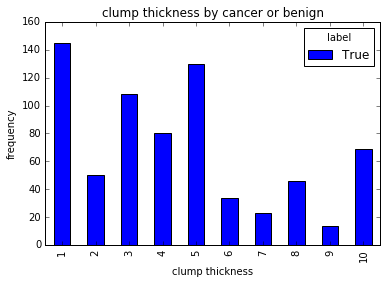

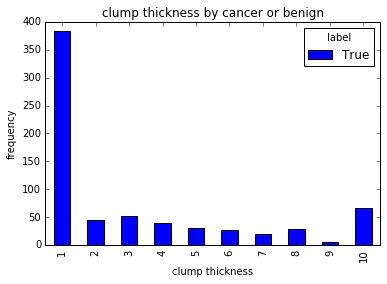

In [159]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.clumpThickness, data.label.astype(bool)).plot(kind='bar')
plt.title('clump thickness by cancer or benign')
plt.xlabel('clump thickness')
plt.ylabel('frequency')

pd.crosstab(data.cellSizeUniformity, data.label.astype(bool)).plot(kind='bar')
plt.title('clump thickness by cancer or benign')
plt.xlabel('clump thickness')
plt.ylabel('frequency')

In [206]:
dataC = data.drop('id',1)
dataC = np.array(dataC)


for i in range(len(data)):
    if data.label[i] == 2:
        dataC[i,9] = 0
    elif data.label[i] == 4:
        dataC[i,9] = 1
    else:
        print('not labeled at '+str(i))

In [207]:
print('There are ' + str(sum(dataC[:,9]==0)) + ' benign and ' +  str(sum(dataC[:,9]==1)) + ' malignant.')

There are 458 benign and 241 malignant.


The 5th column wasn't able to be converted to type float. There are some values in one of the columns that are '?'. Change those to be the median of the numeric values for that column.

In [212]:
y = np.array(data.bareNuclei)
y = np.genfromtxt(y)
y2 = np.median(y[~np.isnan(y)])
print('Median value of bareNuclei is: ' + str(y2))
y[np.isnan(y)] = y2
dataC[:,5] = y
# pd.DataFrame(dataC)

Median value of bareNuclei is: 1.0


## Set up and implement a logistic regression first.

I'm using a logistic regression because all of the features are continuous and the output is binary. 

First I'll try running LR on the whole data set as a sanity check. It should give pretty high accuracy becuase the means are quite separable between the two categories. 


In [218]:
# split into train and test sets
X = np.array(dataC[:,0:9])
y = np.array(dataC[:,9]).astype(int)

print(np.shape(X))
print(np.shape(y))
model = lr()
model = model.fit(X, y)

# check the accuracy on the training set
print('LR score on all data is: ' + str(model.score(X, y)*100) + '%')

# print(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# model = lr()
# model.fit(X_train, y_train)

(699, 9)
(699,)
LR score on all data is: 96.5665236052%


This was probably over trained and won't generalize into new data. So now what I'm going to do is use kfold cross validation to generalize to other data.

In [295]:
model = lr()
model = model.fit(X, y)
kfold = StratifiedKFold(y,n_folds=8,random_state=0,shuffle=True)
scores = []
for k, (train, test) in enumerate(kfold):
    model.fit(X[train], y[train])
    score = model.score(X[test], y[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y[train]), score))
print('Mean accuracy was '+str(np.mean(score)))

Fold: 1, Class dist.: [400 210], Acc: 0.966
Fold: 2, Class dist.: [400 211], Acc: 0.966
Fold: 3, Class dist.: [401 211], Acc: 0.954
Fold: 4, Class dist.: [401 211], Acc: 0.954
Fold: 5, Class dist.: [401 211], Acc: 0.966
Fold: 6, Class dist.: [401 211], Acc: 0.977
Fold: 7, Class dist.: [401 211], Acc: 0.966
Fold: 8, Class dist.: [401 211], Acc: 0.954
Mean accuracy was 0.954022988506


I used K-fold stratified cross validation to evaluate the data on multiple (4) training and test sets. Therefore, the data was divided into 8 parts (from a shuffled dataset) and used in 8 12.5/87.5% splits to train and test. The average accuracy is the total accuracy. The stratified part means that there are an equal distribution of positive labels in each fold. Probalby not necessary here since the data is fairly balanced, but why not.

Next, I'll introduce tuning of the L2 regularization to further optimize the model. There's still 8 fold validation built in.

In [294]:
gs = GridSearchCV(cv=8,
       estimator=lr(C=1.0,penalty='l2'),
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
gs = gs.fit(X, y)
print('From grid search:')
print(gs.best_score_)
print(gs.best_params_)

# now we have the best C value: 10
# run the model again and set up for ROC curve
model=lr(C=10.0,penalty='l2')
model = model.fit(X, y)
kfold = KFold(y.shape[0],n_folds=8,random_state=0,shuffle=True)
scores = []
for k, (train, test) in enumerate(kfold):
    model.fit(X[train], y[train])
    score = model.score(X[test], y[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y[train]), score))
print('Mean accuracy was '+str(np.mean(score)))

From grid search:
0.967095851216
{'C': 10}
Fold: 1, Class dist.: [401 210], Acc: 0.977
Fold: 2, Class dist.: [403 208], Acc: 0.966
Fold: 3, Class dist.: [401 210], Acc: 0.920
Fold: 4, Class dist.: [406 206], Acc: 0.966
Fold: 5, Class dist.: [402 210], Acc: 0.977
Fold: 6, Class dist.: [394 218], Acc: 0.966
Fold: 7, Class dist.: [404 208], Acc: 0.977
Fold: 8, Class dist.: [395 217], Acc: 0.977
Mean accuracy was 0.977011494253


## ROC curve for evaluation

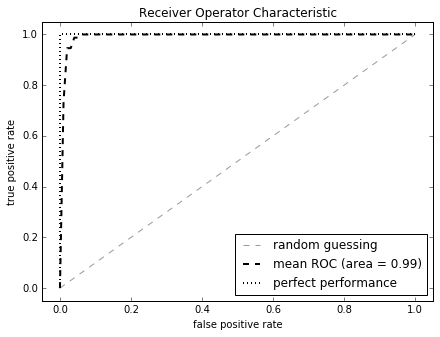

In [306]:
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(kfold):
    probas = model.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    mean_tpr[0] = 0
    roc_auc = auc(fpr,tpr)
    #plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' 
            # % (i+1, roc_auc))

plt.plot([0, 1],[0, 1],
          linestyle='--',
          color=(0.6, 0.6, 0.6),
          label='random guessing')
mean_tpr /= len(kfold)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
          label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],[0, 1, 1],lw=2,
          linestyle=':',
          color='black',
          label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()
 

In [324]:
# here is all that same data in table form.
print('mean TPR, mean FPR')
for i in range(len(mean_tpr)):
    print('%0.2f      %0.2f' % (mean_tpr[i], mean_fpr[i]))

mean TPR, mean FPR
0.00      0.00
0.73      0.01
0.95      0.02
0.95      0.03
0.99      0.04
0.99      0.05
1.00      0.06
1.00      0.07
1.00      0.08
1.00      0.09
1.00      0.10
1.00      0.11
1.00      0.12
1.00      0.13
1.00      0.14
1.00      0.15
1.00      0.16
1.00      0.17
1.00      0.18
1.00      0.19
1.00      0.20
1.00      0.21
1.00      0.22
1.00      0.23
1.00      0.24
1.00      0.25
1.00      0.26
1.00      0.27
1.00      0.28
1.00      0.29
1.00      0.30
1.00      0.31
1.00      0.32
1.00      0.33
1.00      0.34
1.00      0.35
1.00      0.36
1.00      0.37
1.00      0.38
1.00      0.39
1.00      0.40
1.00      0.41
1.00      0.42
1.00      0.43
1.00      0.44
1.00      0.45
1.00      0.46
1.00      0.47
1.00      0.48
1.00      0.49
1.00      0.51
1.00      0.52
1.00      0.53
1.00      0.54
1.00      0.55
1.00      0.56
1.00      0.57
1.00      0.58
1.00      0.59
1.00      0.60
1.00      0.61
1.00      0.62
1.00      0.63
1.00      0.64
1.00      0.65
1.00  

## Analysis

From the ROC curve, we can see that the performance is excellent. There is a mean area under the curve of 0.99. 0.5 is random, 1 is perfect. The model does an excellent job of predicting the correct labels. The other information that the ROC curve provides is false positive rate vs. true positive rate.
 - TPR: The percentage that the model says a case is cancer and it actually is.
 - FPR: The percentage that the model says a case is cancer and it is NOT.
These things will always be in a balance. A perfect TPR will come at the expense of FPR (in the extreme case, you could just say every one has cancer and your TPR is perfect), and vice versa. Therefore, you want to maximize both, corresponding to the upper left corner of the ROC curve. In cancer screening, we'd rather catch all the cancers and a some non-cancers (optimize TRP) becuase it's very costly to do the opposite and miss real cancers in the population (optimize FPR).

This model performs very well and we can kind of have both. At best, this test gives TPR of 0.99 and FPR of 0.05. That's far better than most breast cancer tests!